In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [30]:
data= pd.read_csv("uber.csv")

In [31]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [32]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [33]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [34]:
data=data.drop(["Unnamed: 0", "key", "pickup_datetime"], axis=1)
data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5


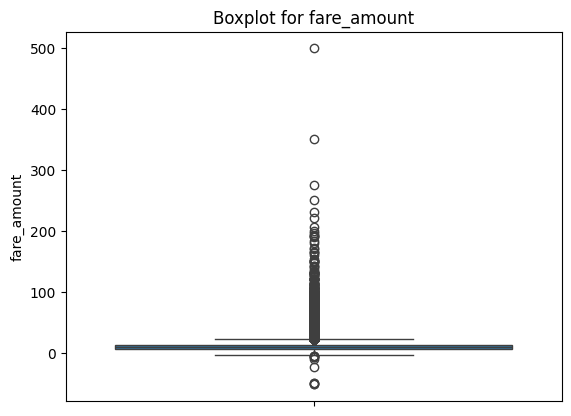

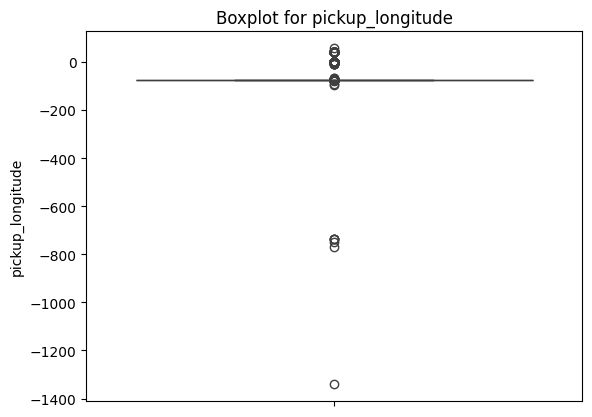

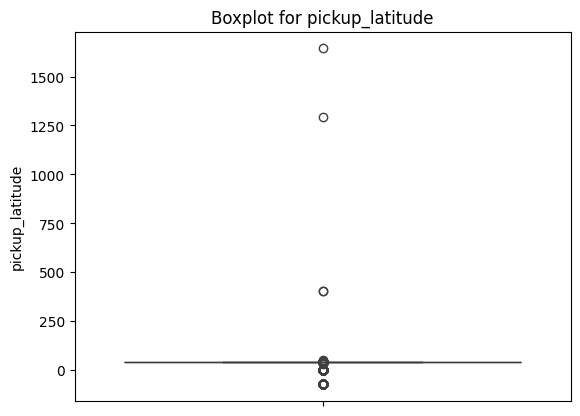

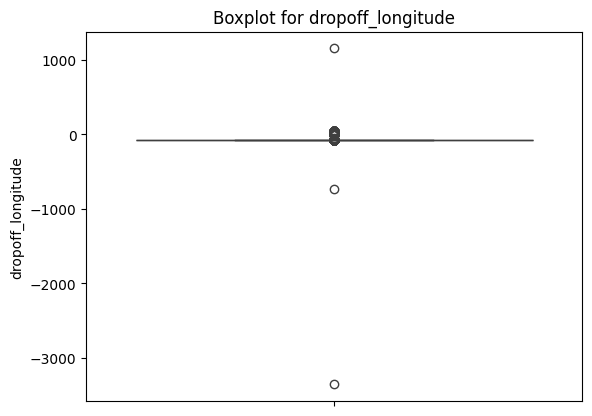

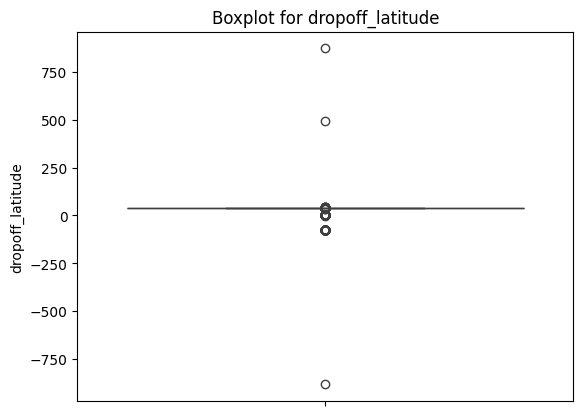

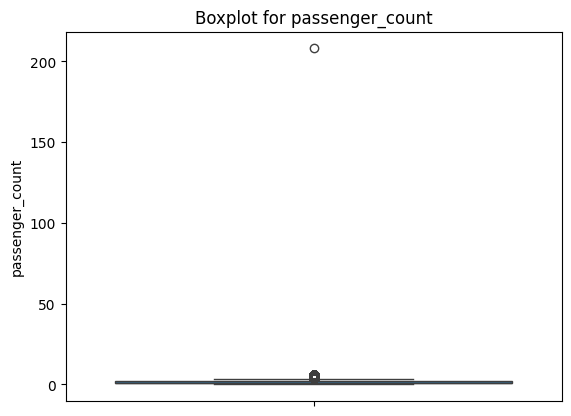

In [35]:
for i in data.columns:
    sns.boxplot(data=data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

<Axes: >

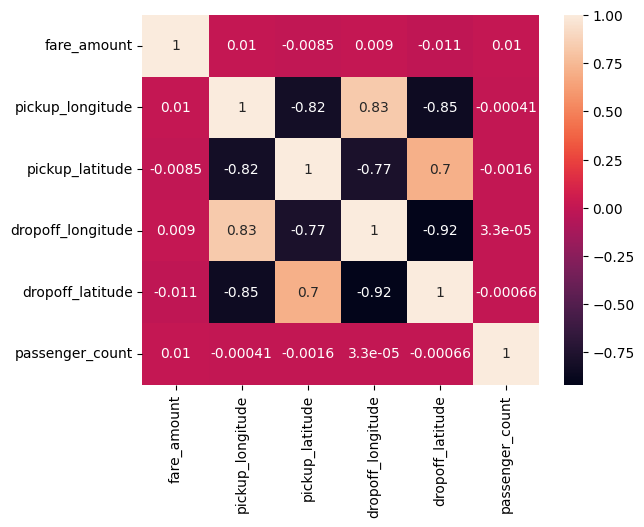

In [36]:
sns.heatmap(data.corr(), annot=True)

In [37]:
x=data.drop('fare_amount', axis=1)
y=data['fare_amount']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(x)

array([[0.90600001, 0.06677805, 0.72782548, 0.5258549 , 0.00480769],
       [0.90600392, 0.06677215, 0.72782654, 0.52587035, 0.00480769],
       [0.90599627, 0.06677945, 0.72783367, 0.52588307, 0.00480769],
       ...,
       [0.90600988, 0.0667886 , 0.72785664, 0.52583745, 0.00961538],
       [0.90600193, 0.06677054, 0.72782909, 0.52583906, 0.00480769],
       [0.90601104, 0.06676741, 0.72782858, 0.52588088, 0.00480769]])

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
y_pred[:5]

array([11.31108845, 11.31124729, 11.31084082, 11.31165446, 11.31348753])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)

In [42]:
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)
print("R-square: ",r2)

Mean squared error:  97.07002526552007
Root mean squared error:  9.852412154671569
R-square:  0.0003521075436619947


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf= rf_model.predict(x_test)
y_pred_rf[:5]

array([ 6.961 , 13.164 ,  9.58  ,  6.253 , 33.8663])

In [44]:
mse= mean_squared_error(y_test, y_pred_rf)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred_rf)

In [45]:
print("Mean squared error: ", mse)
print("Root mean squared error: ",rmse)
print("R-square: ",r2)

Mean squared error:  23.819085977799492
Root mean squared error:  4.880480097060072
R-square:  0.7547059554912746
